In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Cargamos los datos de entrenamiento y el maestro de productos
data = pd.read_csv('train2.csv', delimiter='|')
product_data = pd.read_csv('RentabilidadProduct.csv', delimiter='|')
# We print some information about Google_stock
print('Data is of type:', type(data))
print('data has shape:', data.shape)

Data is of type: <class 'pandas.core.frame.DataFrame'>
data has shape: (2167848, 9)


In [3]:
data.isnull().any()

fecha_compra          False
customer_id           False
product_id            False
type_id               False
business_id           False
channel_id            False
cantidad_venta        False
monto_venta_transf    False
peso_venta_transf     False
dtype: bool

In [4]:
data.describe()

,customer_id,product_id,business_id,cantidad_venta,monto_venta_transf,peso_venta_transf
count,2.167848e+06,2.167848e+06,2.167848e+06,2.167848e+06,2.167848e+06,2.167848e+06
mean,6.495294e+03,4.327939e+02,3.079470e+01,4.033649e+00,2.678429e+01,4.801825e+00
std,4.130133e+03,3.021948e+02,1.384631e+01,6.993144e+00,1.255970e+02,3.601104e+01
min,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,2.315932e-02,2.315932e-03
25%,2.687000e+03,1.720000e+02,2.100000e+01,1.000000e+00,2.055390e+00,1.748529e-01
50%,6.459000e+03,4.110000e+02,2.100000e+01,2.000000e+00,5.352699e+00,6.368814e-01
75%,9.945000e+03,6.830000e+02,5.100000e+01,5.000000e+00,1.384059e+01,2.431729e+00
max,1.531200e+04,1.048000e+03,7.100000e+01,4.800000e+02,1.685446e+04,3.473899e+03


In [5]:
data.head()

,fecha_compra,customer_id,product_id,type_id,business_id,channel_id,cantidad_venta,monto_venta_transf,peso_venta_transf
0,2022-01-31,7157,510,BO,21,V,1.0,0.153431,0.005211
1,2022-01-31,7157,512,BO,21,V,1.0,0.153431,0.005211
2,2022-01-31,9382,510,BO,21,V,1.0,0.153431,0.005211
3,2022-01-31,9382,512,BO,21,V,1.0,0.153431,0.005211
4,2022-01-31,9382,525,BO,21,V,1.0,0.153431,0.005790


In [6]:
print()
print('Maximum values of each column:\n', data.max())


Maximum values of each column:
 fecha_compra           2023-02-04
customer_id                 15312
product_id                   1048
type_id                        PA
business_id                    71
channel_id                      V
cantidad_venta              480.0
monto_venta_transf    16854.46158
peso_venta_transf     3473.898621
dtype: object


In [7]:
unique_counts = data.nunique()
print(unique_counts)

fecha_compra            327
customer_id           15312
product_id             1043
type_id                   3
business_id              10
channel_id                3
cantidad_venta          147
monto_venta_transf    36737
peso_venta_transf      2382
dtype: int64


In [8]:
d2 = data.drop(['fecha_compra', 'type_id', 'channel_id'], axis=1)
d2

,customer_id,product_id,business_id,cantidad_venta,monto_venta_transf,peso_venta_transf
0,7157,510,21,1.0,0.153431,0.005211
1,7157,512,21,1.0,0.153431,0.005211
2,9382,510,21,1.0,0.153431,0.005211
3,9382,512,21,1.0,0.153431,0.005211
4,9382,525,21,1.0,0.153431,0.005790
...,...,...,...,...,...,...
2167843,646,667,31,55.0,2085.986380,796.101767
2167844,13758,667,31,60.0,2339.780728,868.474655
2167845,3111,673,31,64.0,2460.348170,926.372966
2167846,10520,679,31,100.0,3531.912728,1447.457759


In [9]:
d2.corr()

,customer_id,product_id,business_id,cantidad_venta,monto_venta_transf,peso_venta_transf
customer_id,1.000000,0.013958,0.038076,-0.018388,-0.002326,0.000164
product_id,0.013958,1.000000,-0.112500,-0.039434,-0.096545,0.000254
business_id,0.038076,-0.112500,1.000000,-0.000626,0.136700,0.065385
cantidad_venta,-0.018388,-0.039434,-0.000626,1.000000,0.428415,0.377870
monto_venta_transf,-0.002326,-0.096545,0.136700,0.428415,1.000000,0.859376
peso_venta_transf,0.000164,0.000254,0.065385,0.377870,0.859376,1.000000


In [10]:
d2.mean()

customer_id           6495.293539
product_id             432.793912
business_id             30.794698
cantidad_venta           4.033649
monto_venta_transf      26.784295
peso_venta_transf        4.801825
dtype: float64

In [11]:
d2.max()
# monto_venta_transf    16854.461580 
# cantidad_venta          480.000000 parecen outlier
# peso_venta_transf      3473.898621

customer_id           15312.000000
product_id             1048.000000
business_id              71.000000
cantidad_venta          480.000000
monto_venta_transf    16854.461580
peso_venta_transf      3473.898621
dtype: float64

In [12]:
d2.min()

customer_id            1.000000
product_id             1.000000
business_id           21.000000
cantidad_venta         1.000000
monto_venta_transf     0.023159
peso_venta_transf      0.002316
dtype: float64

In [13]:
base_color = sb.color_palette()[0]

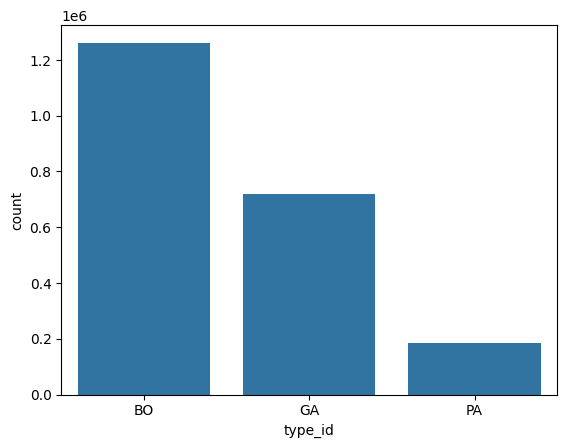

In [14]:
sb.countplot(data=data, x='type_id', color =base_color);

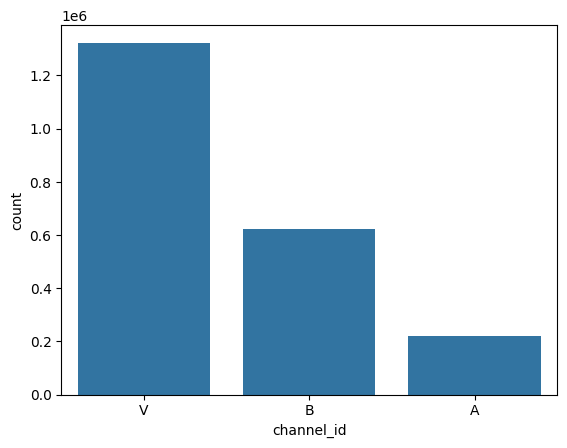

In [15]:
sb.countplot(data=data, x='channel_id', color =base_color);

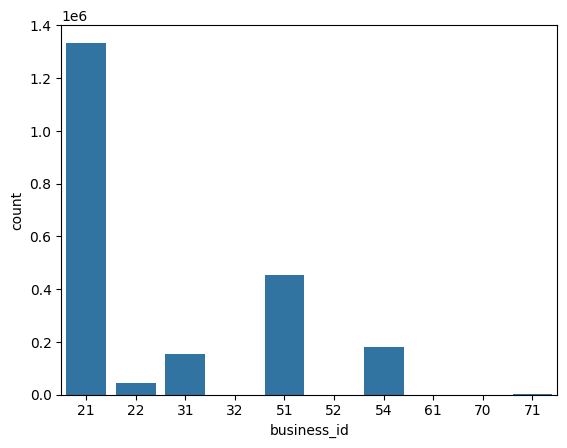

In [16]:
sb.countplot(data=data, x='business_id', color =base_color);

In [17]:
freq0 = data['channel_id'].value_counts()
freq0

channel_id
V    1323703
B     623675
A     220470
Name: count, dtype: int64

In [18]:
freq = data['product_id'].value_counts()
freq
gen_order = freq.index

In [19]:
freq1 = data['type_id'].value_counts()
freq1

type_id
BO    1261997
GA     720281
PA     185570
Name: count, dtype: int64

In [20]:
freq2 = data['business_id'].value_counts()
freq2

business_id
21    1334771
51     453874
54     181912
31     153705
22      42829
71        533
52        152
61         70
32          1
70          1
Name: count, dtype: int64

In [21]:
freq3 = data['channel_id'].value_counts()
freq3

channel_id
V    1323703
B     623675
A     220470
Name: count, dtype: int64

In [22]:
freq4 = data['customer_id'].value_counts()
freq4
gen_order2 = freq4.index

In [23]:
#sb.countplot(data=data, y='product_id', color = base_color, order=gen_order);

In [24]:
#sb.countplot(data=data, y='customer_id', color = base_color, order=gen_order2);

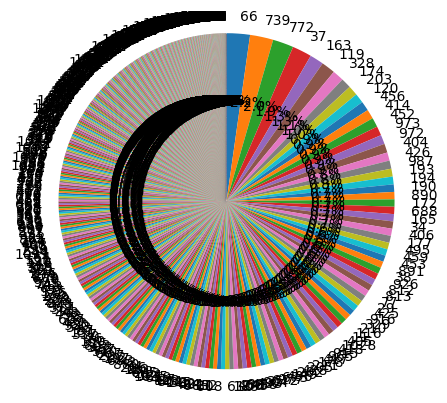

In [25]:
# Use the same pokemon dataset
sorted_counts = freq

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.axis('square');

(-1.0999943803649455,
 1.1000038902636522,
 -1.0999983492363885,
 1.0999999213922091)

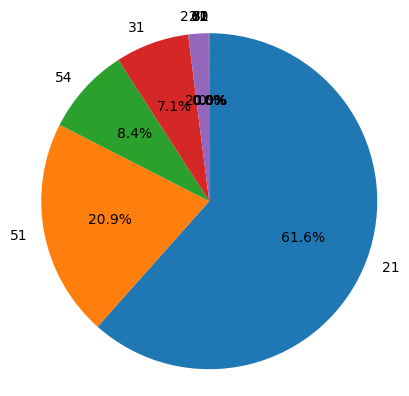

In [26]:
# business
sorted_counts = freq2

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.axis('square')

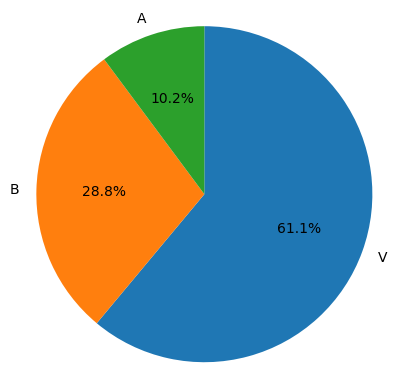

In [27]:
# channel_id
sorted_counts = freq0

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.axis('square');

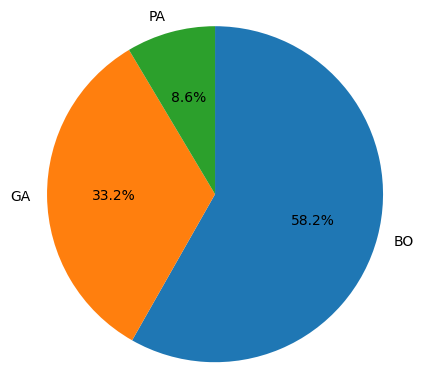

In [28]:
# type_id
sorted_counts = freq1

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');

plt.axis('square');

# Histograms

In [29]:
# fecha_compra          False
# customer_id           False
# product_id            False
# type_id               False
# business_id           False
# channel_id            False
# cantidad_venta        False
# monto_venta_transf    False
# peso_venta_transf     False
# dtype: bool
data['fecha_compra'].describe()

count        2167848
unique           327
top       2022-04-07
freq            8619
Name: fecha_compra, dtype: object

In [30]:
data['cantidad_venta'].describe()

count    2.167848e+06
mean     4.033649e+00
std      6.993144e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      4.800000e+02
Name: cantidad_venta, dtype: float64

In [31]:
data['monto_venta_transf'].describe()

count    2.167848e+06
mean     2.678429e+01
std      1.255970e+02
min      2.315932e-02
25%      2.055390e+00
50%      5.352699e+00
75%      1.384059e+01
max      1.685446e+04
Name: monto_venta_transf, dtype: float64

In [32]:
data['peso_venta_transf'].describe()

count    2.167848e+06
mean     4.801825e+00
std      3.601104e+01
min      2.315932e-03
25%      1.748529e-01
50%      6.368814e-01
75%      2.431729e+00
max      3.473899e+03
Name: peso_venta_transf, dtype: float64

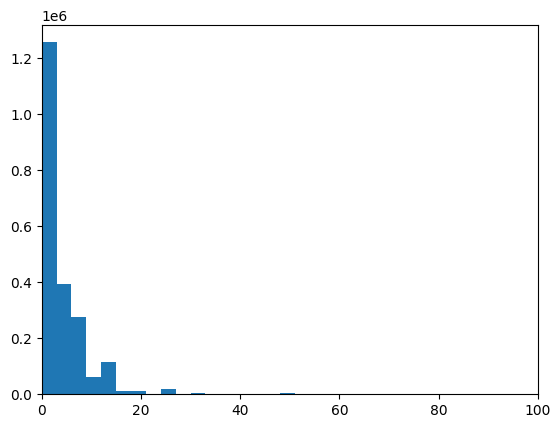

In [59]:
import numpy as np
# Get the ticks for bins between [0-15], at an interval of 0.5
bins = np.arange(0, data['cantidad_venta'].max()+3, 3)
plt.hist(data = data, x = 'cantidad_venta', bins = bins);
plt.xlim((0,100));

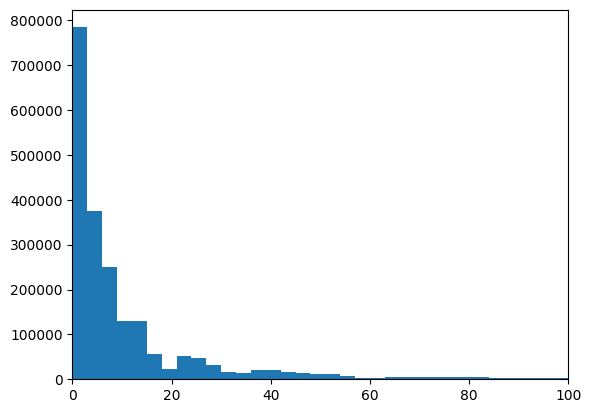

In [61]:
bins = np.arange(0, data['monto_venta_transf'].max()+3, 3)
plt.hist(data = data, x = 'monto_venta_transf', bins = bins);
plt.xlim((0,100));

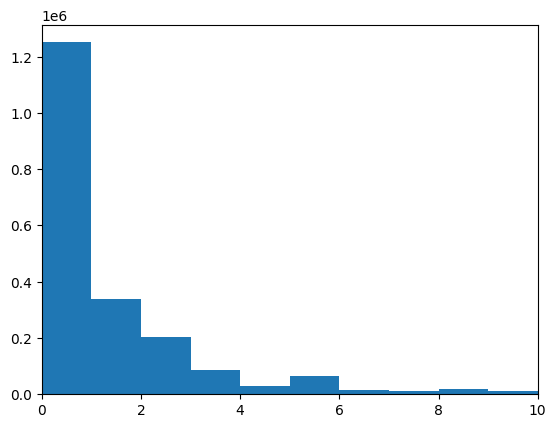

In [64]:
bins = np.arange(0, data['monto_venta_transf'].max()+1, 1)
plt.hist(data = data, x = 'peso_venta_transf', bins = bins);
plt.xlim((0,10));

## Scaling

In [65]:
data['cantidad_venta'].describe()

count    2.167848e+06
mean     4.033649e+00
std      6.993144e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      4.800000e+02
Name: cantidad_venta, dtype: float64

In [66]:
np.log10(data['cantidad_venta'].describe())

count    6.336029
mean     0.605698
std      0.844672
min      0.000000
25%      0.000000
50%      0.301030
75%      0.698970
max      2.681241
Name: cantidad_venta, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

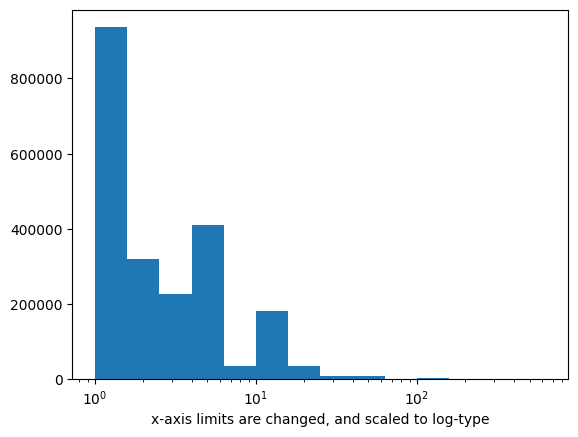

In [77]:
## Axis transformation
## Bin size
bins = 10 ** np.arange(0, 2.68+0.2, 0.2)
plt.hist(data=data, x='cantidad_venta', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

## Apply x-axis label
## Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

In [70]:
data['monto_venta_transf'].describe()


count    2.167848e+06
mean     2.678429e+01
std      1.255970e+02
min      2.315932e-02
25%      2.055390e+00
50%      5.352699e+00
75%      1.384059e+01
max      1.685446e+04
Name: monto_venta_transf, dtype: float64

In [69]:
np.log10(data['monto_venta_transf'].describe())

count    6.336029
mean     1.427880
std      2.098979
min     -1.635274
25%      0.312894
50%      0.728573
75%      1.141155
max      4.226715
Name: monto_venta_transf, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

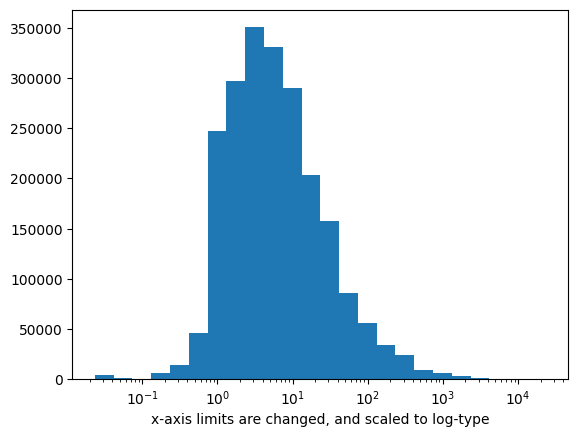

In [76]:
## Axis transformation
## Bin size
bins = 10 ** np.arange(-1.63, 4.25+0.25, 0.25)
plt.hist(data=data, x='monto_venta_transf', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

## Apply x-axis label
## Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

In [78]:
data['peso_venta_transf'].describe()

count    2.167848e+06
mean     4.801825e+00
std      3.601104e+01
min      2.315932e-03
25%      1.748529e-01
50%      6.368814e-01
75%      2.431729e+00
max      3.473899e+03
Name: peso_venta_transf, dtype: float64

In [79]:
np.log10(data['peso_venta_transf'].describe())

count    6.336029
mean     0.681406
std      1.556436
min     -2.635274
25%     -0.757327
50%     -0.195941
75%      0.385915
max      3.540817
Name: peso_venta_transf, dtype: float64

Text(0.5, 0, 'x-axis limits are changed, and scaled to log-type')

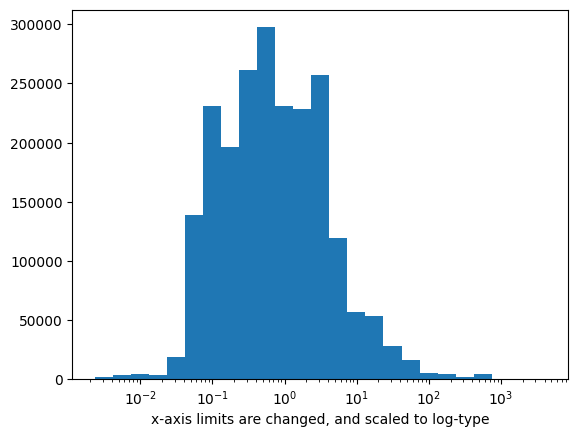

In [80]:
## Axis transformation
## Bin size
bins = 10 ** np.arange(-2.63, 3.54+0.25, 0.25)
plt.hist(data=data, x='peso_venta_transf', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

## Apply x-axis label
## Documentatin: [matplotlib `xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))
plt.xlabel('x-axis limits are changed, and scaled to log-type')

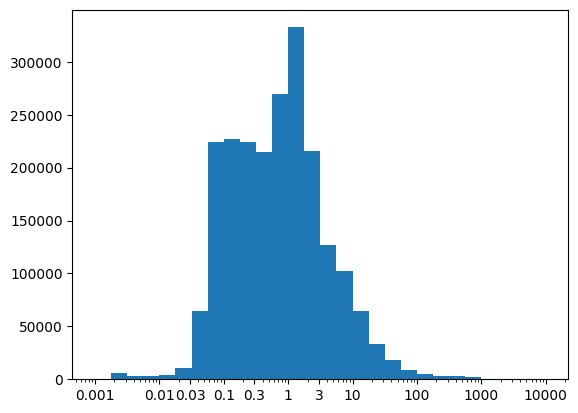

In [83]:
## Axis transformation
## Bin size
bins = 10 ** np.arange(-3, 4+0.25, 0.25)

## Generate the x-ticks you want to apply
ticks = [0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10,  100, 1000, 10000]
## Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=data, x='peso_venta_transf', bins=bins);

## The argument in the xscale() represents the axis scale type to apply.
## The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

## Apply x-ticks
plt.xticks(ticks, labels);

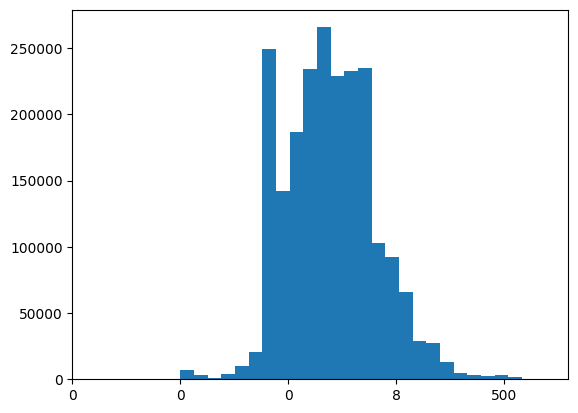

In [97]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

## Bin resizing, to transform the x-axis    
step = 0.225
bin_edges = np.arange(log_trans(data['peso_venta_transf'].min())-step, log_trans(data['peso_venta_transf'].max()), step)

## Plot the scaled data
plt.hist(data['peso_venta_transf'].apply(log_trans), bins = bin_edges)

## Identify the tick-locations
step2 = 10**.25
tick_locs = np.arange(log_trans(data['peso_venta_transf'].min())-step2, log_trans(data['peso_venta_transf'].max()), step2)

## Apply x-ticks
plt.xticks(tick_locs, log_trans(tick_locs, inverse = True).astype(int));

# Bivariate
## Scatter

Text(0, 0.5, 'peso_venta_transf ')

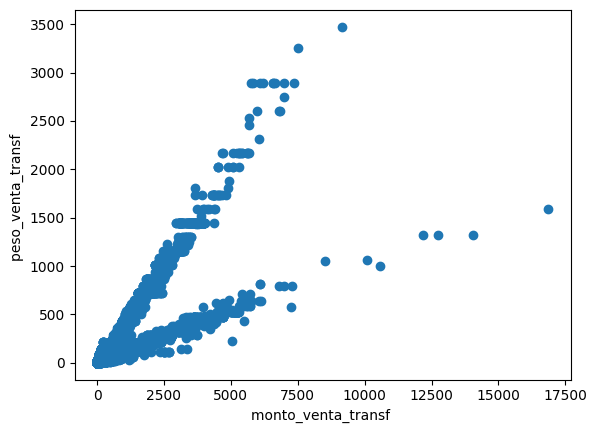

In [98]:
# fecha_compra          False
# customer_id           False
# product_id            False
# type_id               False
# business_id           False
# channel_id            False
# cantidad_venta        False
# monto_venta_transf    False
# peso_venta_transf     False
# dtype: bool

# Scatter plot
plt.scatter(data = data, x = 'monto_venta_transf', y = 'peso_venta_transf');
plt.xlabel('monto_venta_transf ')
plt.ylabel('peso_venta_transf ')

Text(0, 0.5, 'peso_venta_transf ')

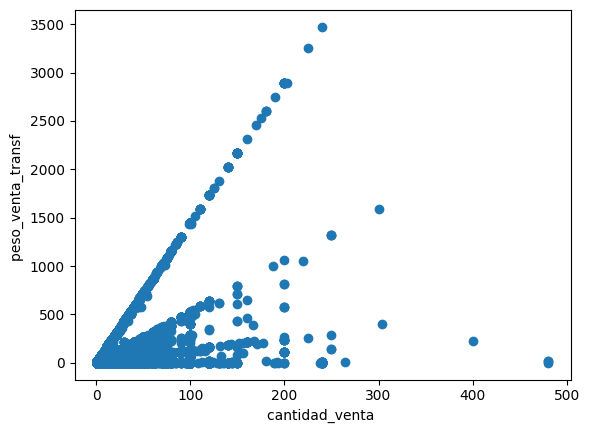

In [99]:
plt.scatter(data = data, x = 'cantidad_venta', y = 'peso_venta_transf');
plt.xlabel('cantidad_venta ')
plt.ylabel('peso_venta_transf ')

Text(0, 0.5, 'monto_venta_transf ')

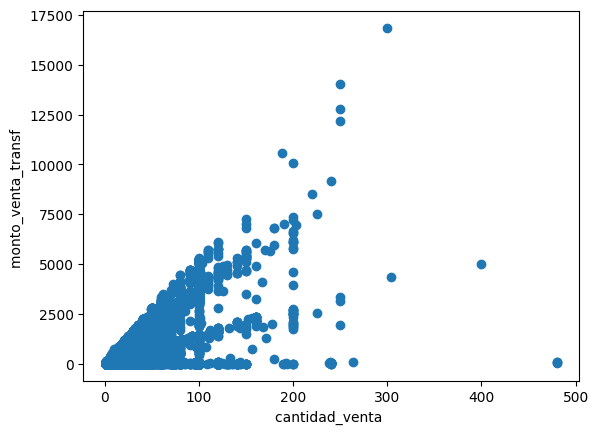

In [101]:
plt.scatter(data = data, x = 'cantidad_venta', y = 'monto_venta_transf');
plt.xlabel('cantidad_venta ')
plt.ylabel('monto_venta_transf ')

## Overplotting, Transparency, and Jitter

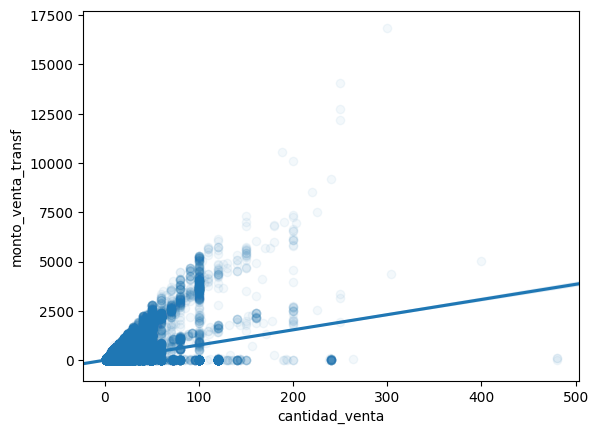

In [121]:
sb.regplot(data = data, x = 'cantidad_venta', y = 'monto_venta_transf', truncate=False, scatter_kws={'alpha':1/20});
# sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

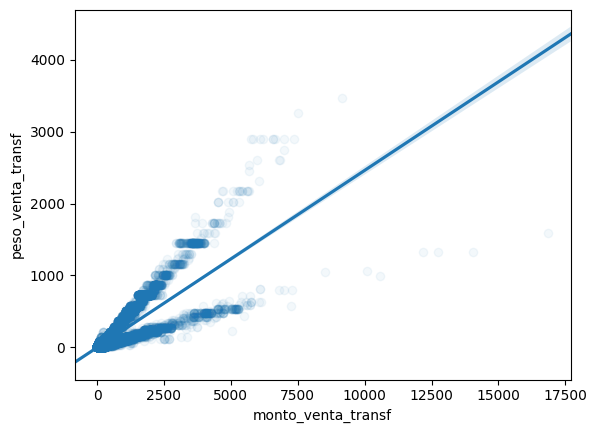

In [122]:
sb.regplot(data = data, x = 'monto_venta_transf', y = 'peso_venta_transf', truncate=False, scatter_kws={'alpha':1/20});

## Violin

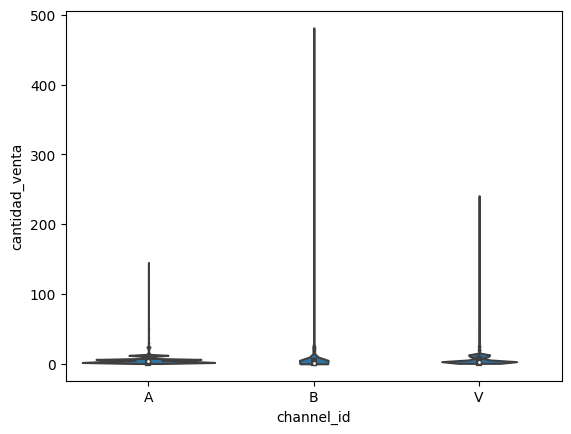

In [129]:
# Types of sedan cars
classes = data['channel_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['channel_id'] = data['channel_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='channel_id', y='cantidad_venta',color=base_color, innner=None);

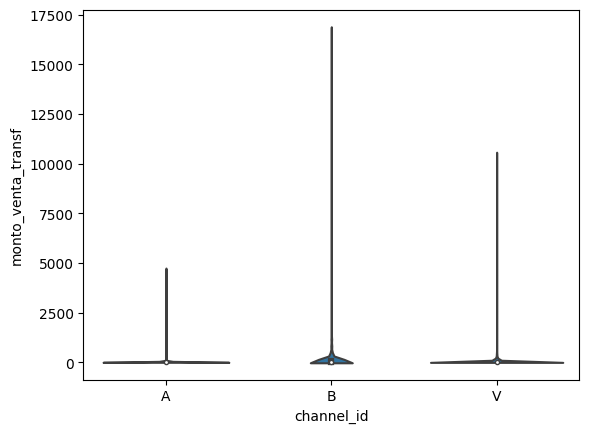

In [130]:
# Types of sedan cars
classes = data['channel_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['channel_id'] = data['channel_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='channel_id', y='monto_venta_transf',color=base_color, innner=None);

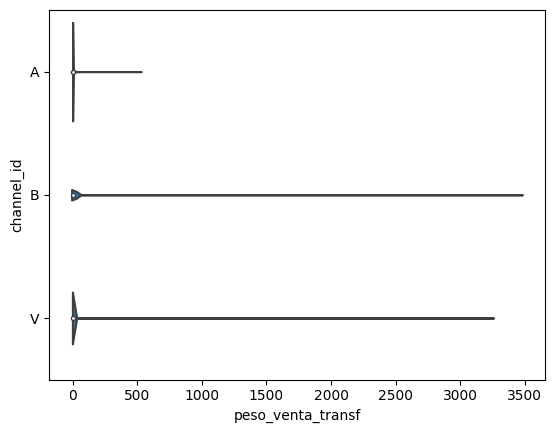

In [132]:
# Types of sedan cars
classes = data['channel_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['channel_id'] = data['channel_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, y='channel_id', x='peso_venta_transf',color=base_color, innner=None);

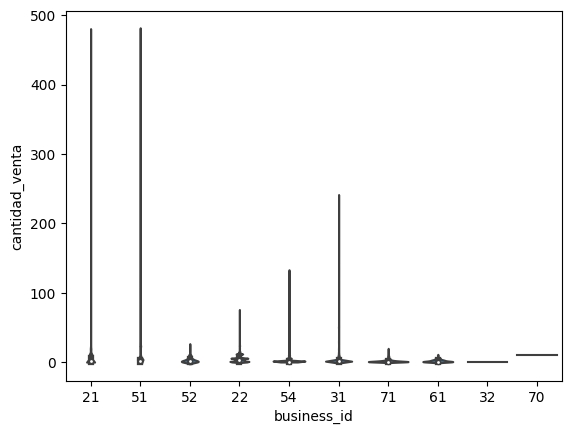

In [133]:
# Types of sedan cars
classes = data['business_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['business_id'] = data['business_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='business_id', y='cantidad_venta',color=base_color, innner=None);

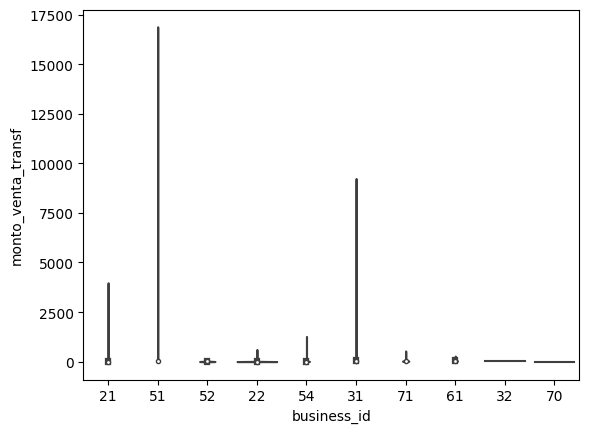

In [135]:
# Types of sedan cars
classes = data['business_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['business_id'] = data['business_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='business_id', y='monto_venta_transf',color=base_color, innner=None);

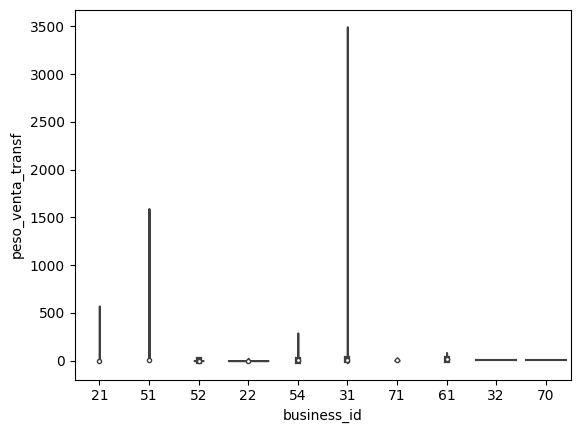

In [136]:
# Types of sedan cars
classes = data['business_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['business_id'] = data['business_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='business_id', y='peso_venta_transf',color=base_color, innner=None);

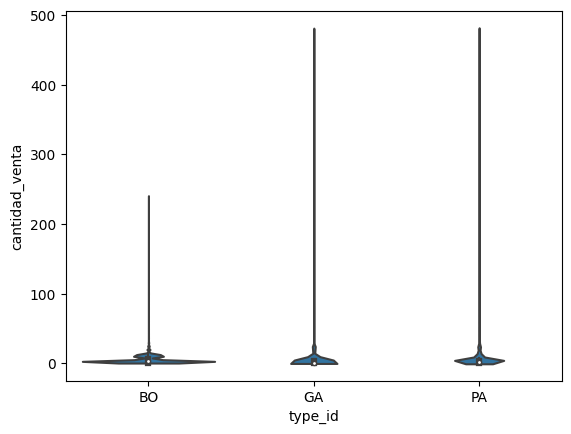

In [137]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='type_id', y='cantidad_venta',color=base_color, innner=None);

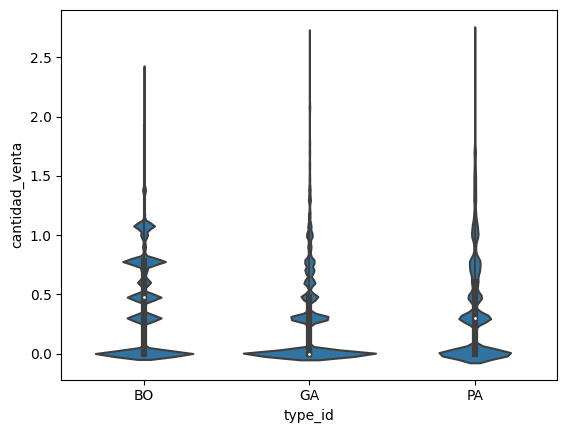

In [143]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
ny = np.log10(data['cantidad_venta'])
sb.violinplot(data=data, x='type_id', y=ny, color=base_color, innner=None);


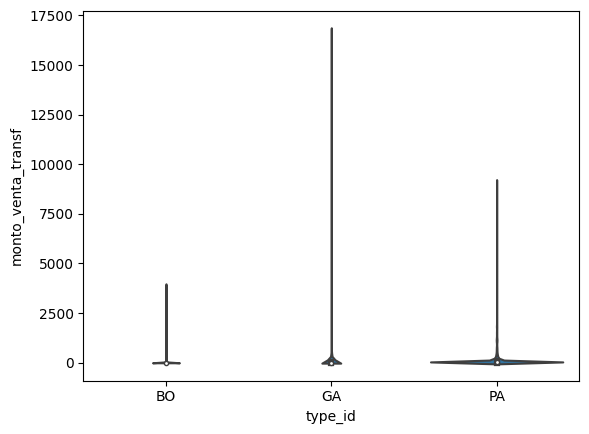

In [138]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='type_id', y='monto_venta_transf',color=base_color, innner=None);

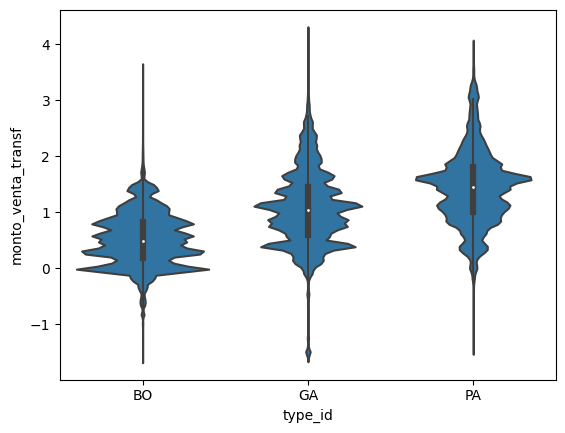

In [144]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
ny = np.log10(data['monto_venta_transf'])
sb.violinplot(data=data, x='type_id', y=ny,color=base_color, innner=None);

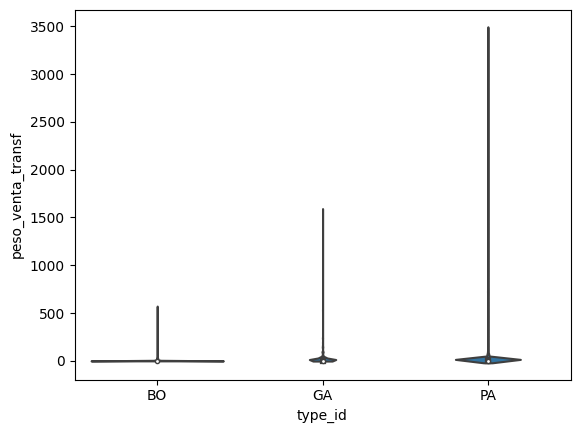

In [139]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
sb.violinplot(data=data, x='type_id', y='peso_venta_transf',color=base_color, innner=None);

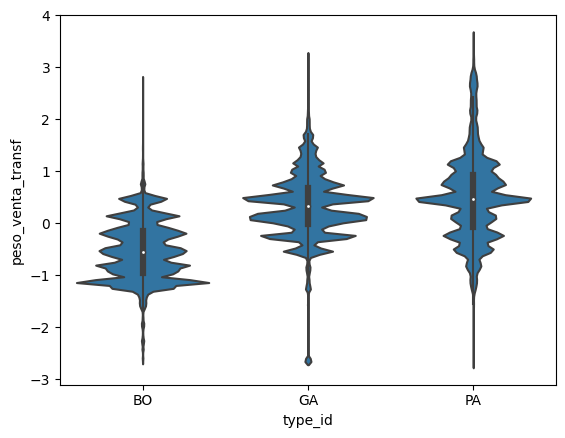

In [145]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
ny = np.log10(data['peso_venta_transf'])
sb.violinplot(data=data, x='type_id', y=ny, color=base_color, innner=None);

## Boxplots

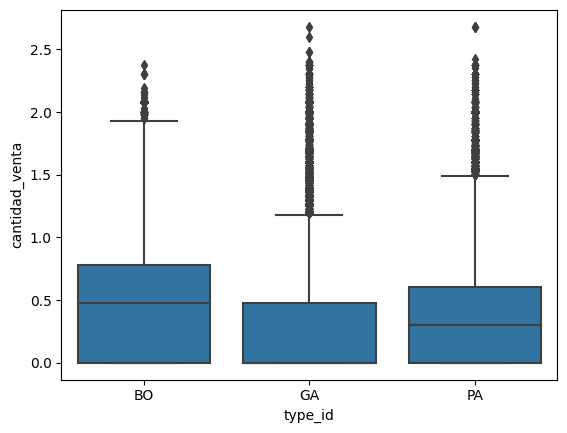

In [142]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
ny = np.log10(data['cantidad_venta'])
sb.boxplot(data=data, x='type_id', y=ny, color=base_color);

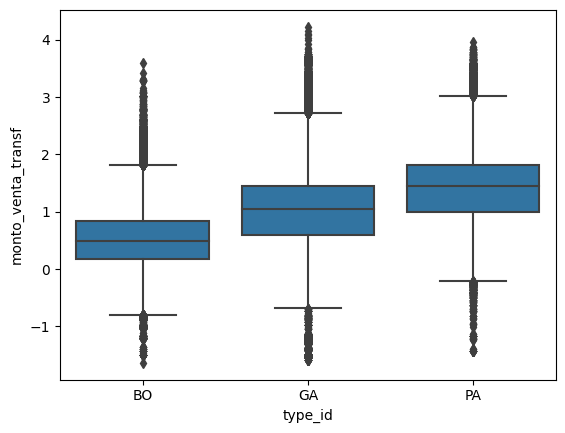

In [146]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
ny = np.log10(data['monto_venta_transf'])
sb.boxplot(data=data, x='type_id', y=ny, color=base_color);

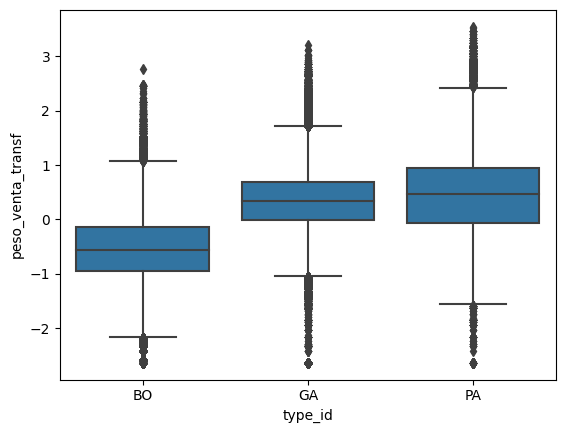

In [147]:
# Types of sedan cars
classes = data['type_id'].unique()

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
data['type_id'] = data['type_id'].astype(vclasses);
base_color = sb.color_palette()[0]
ny = np.log10(data['peso_venta_transf'])
sb.boxplot(data=data, x='type_id', y=ny, color=base_color);

## Categorical and Categorical

<Axes: xlabel='type_id', ylabel='count'>

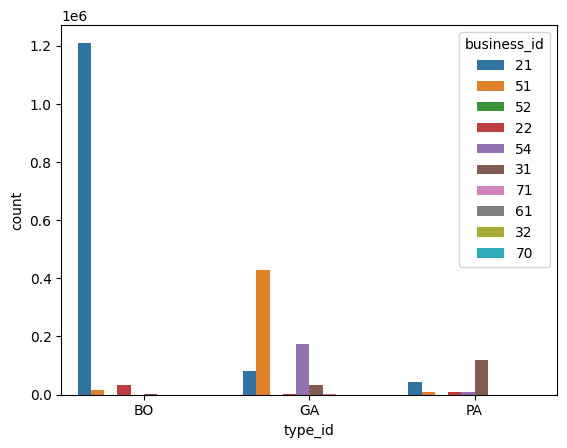

In [148]:
sb.countplot(data = data, x = 'type_id', hue = 'business_id')

<Axes: xlabel='type_id', ylabel='count'>

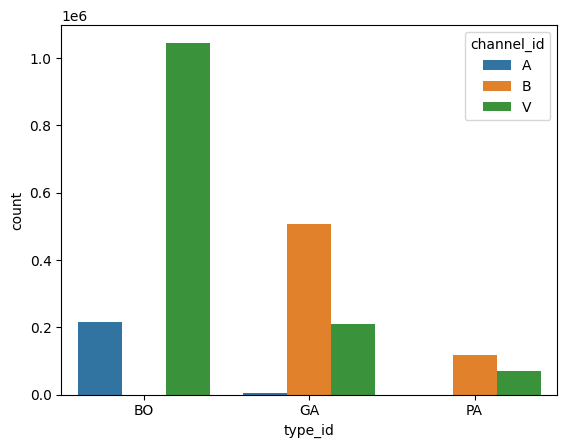

In [149]:
sb.countplot(data = data, x = 'type_id', hue = 'channel_id')

<Axes: xlabel='channel_id', ylabel='count'>

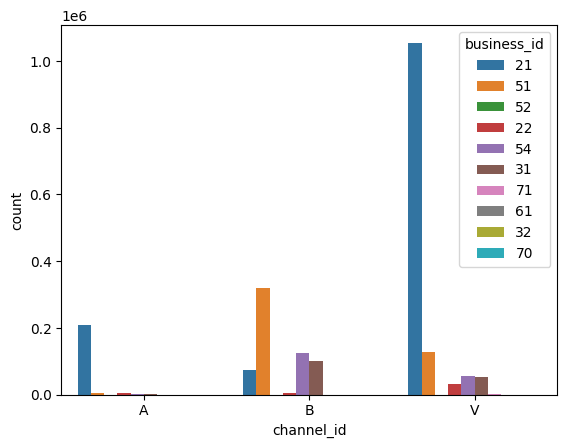

In [152]:
sb.countplot(data = data, x = 'channel_id', hue = 'business_id')

## Faceting

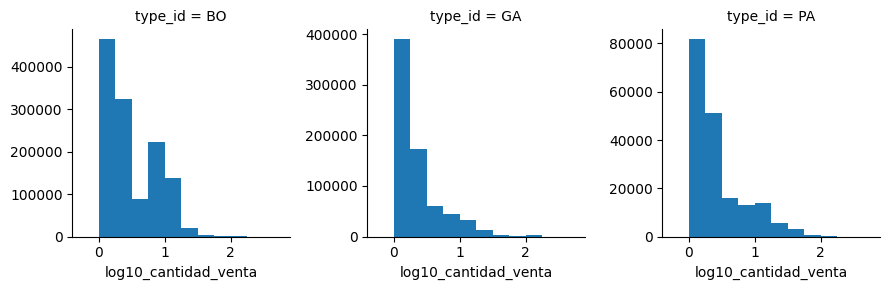

In [165]:
# Plot the Seaborn's FacetGrid
bins = np.arange(data["log10_cantidad_venta"].min()-0.25, data["log10_cantidad_venta"].max()+0.25,0.25)
g = sb.FacetGrid(data = data, col = 'type_id', sharey = False)
data["log10_cantidad_venta"] = np.log10(data['cantidad_venta'])
g.map(plt.hist, "log10_cantidad_venta", bins = bins)

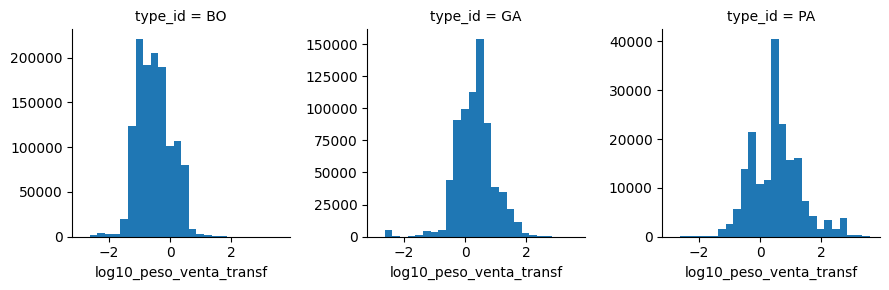

In [166]:
# Plot the Seaborn's FacetGrid
data["log10_peso_venta_transf"] = np.log10(data['peso_venta_transf'])
bins = np.arange(data["log10_peso_venta_transf"].min()-0.25, data["log10_peso_venta_transf"].max()+0.25,0.25)
g = sb.FacetGrid(data = data, col = 'type_id', sharey = False)
g.map(plt.hist, "log10_peso_venta_transf", bins = bins)

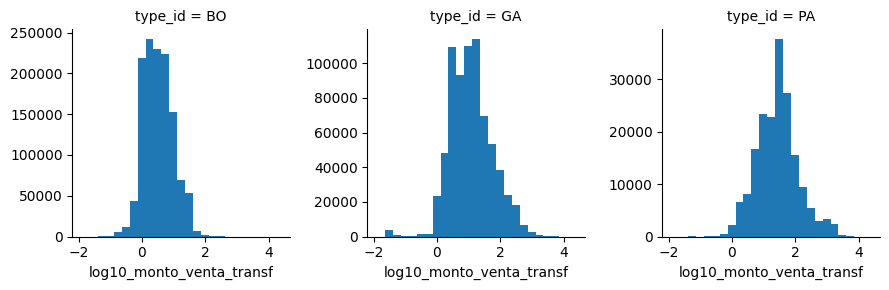

In [167]:
# Plot the Seaborn's FacetGrid
data["log10_monto_venta_transf"] = np.log10(data['monto_venta_transf'])
bins = np.arange(data["log10_monto_venta_transf"].min()-0.25, data["log10_monto_venta_transf"].max()+0.25,0.25)
g = sb.FacetGrid(data = data, col = 'type_id', sharey = False)
g.map(plt.hist, "log10_monto_venta_transf", bins = bins)